In [19]:
import torch
import matplotlib.pyplot as plt
from stimulus import *
from ipywidgets import interact_manual, FloatSlider
import ipywidgets as widgets
from IPython.display import display,  clear_output

In [12]:
#study parameters of interest

def transition(hf, hs, pars,input = 0):
    # size (B, V)
    a,b,c,d,e = pars['a'],pars['b'],pars['c'],pars['d'],pars['e']
    hfn = hf * (1-c) + c*torch.tanh(input  + (a + b*hf**2 - hs)*hf) #0 input response
    hsn = hs*(1-d) + d*(e*hf)**4

    return hfn, hsn 

hfs = torch.meshgrid(torch.linspace(-1.5,1.5, 100), torch.linspace(-.5,6,100), indexing = 'ij')
hfs = torch.cat((hfs[0].unsqueeze(0), hfs[1].unsqueeze(0)))

def pulse(t, begin , end):    
    return  np.heaviside(t - begin, 0) - np.heaviside(t - end, 0)


In [ ]:
pars = {'a': 1, # additive slow feedback bias
        'b': 2, # multiplicative modulation bias 
        'c': 0.9, # speed of fast
        'd': 0.1, # speed of slow
        'e': 1.3  # impact of fast varibale on slow feedback
        }

trajectory_times_steps = 500
init_point_trajectory = [torch.tensor(0),torch.tensor(0)]

input_amplitude = 1
input_signal = input_amplitude * pulse(np.arange(trajectory_times_steps),50,150)
input_signal = input_signal  - pulse(np.arange(trajectory_times_steps),300,350)
fig, axs = plt.subplots(2,1,figsize=(10,10))


def update_plots(a=1, b=2, c=0.9, d=0.1, e=1.3):
    pars = {'a': a, 'b': b, 'c': c, 'd': d, 'e': e}
    
    fig, axs = plt.subplots(2, 1, figsize=(10, 10))
    
    # Phase portrait and trajectory plot
    hfn, hsn = transition(hfs[0], hfs[1], pars,input_amplitude)
    axs[0].contourf(hfs[1], hfs[0], hfn - hfs[0], 0)
    axs[0].contour(hfs[1], hfs[0], hsn - hfs[1], 0)
    axs[0].set_title(f'{a}')
    axs[0].set_xlabel('Fast Variable')
    axs[0].set_ylabel('Slow Variable')
    axs[0].set_title('Phase Portrait and Trajectory')
    
    trajectory = [init_point_trajectory]
    for i in range(trajectory_times_steps):
        next_fast, next_slow = transition(trajectory[-1][0], trajectory[-1][1], pars, input=input_signal[i])
        trajectory.append([next_fast, next_slow])
    trajectory = np.array(trajectory)
    axs[0].plot(trajectory[:, 1], trajectory[:, 0], label="trajectory", color="r")
    axs[0].legend()
    
    # Fast, slow, and input signal plot
    axs[1].plot(trajectory[:, 0], label="Fast Variable")
    axs[1].plot(trajectory[:, 1], label="Slow Variable")
    axs[1].plot(input_signal, label="Input Signal")
    axs[1].set_xlabel('Time')
    axs[1].set_ylabel('Value')
    axs[1].set_title('Fast, Slow, and Input Signal')
    axs[1].legend()
    
    plt.tight_layout()
    plt.show()

interact_manual(update_plots,   a=FloatSlider(min=0, max=2, step=0.01, value=1),
                                b=FloatSlider(min=0, max=3, step=0.01, value=1.5),
                                c=FloatSlider(min=0, max=1, step=0.01, value=0.9),
                                d=FloatSlider(min=0, max=1, step=0.01, value=0.1),
                                e=FloatSlider(min=0, max=3, step=0.01, value=0.9))

Button(description='Randomize Parameters', style=ButtonStyle())

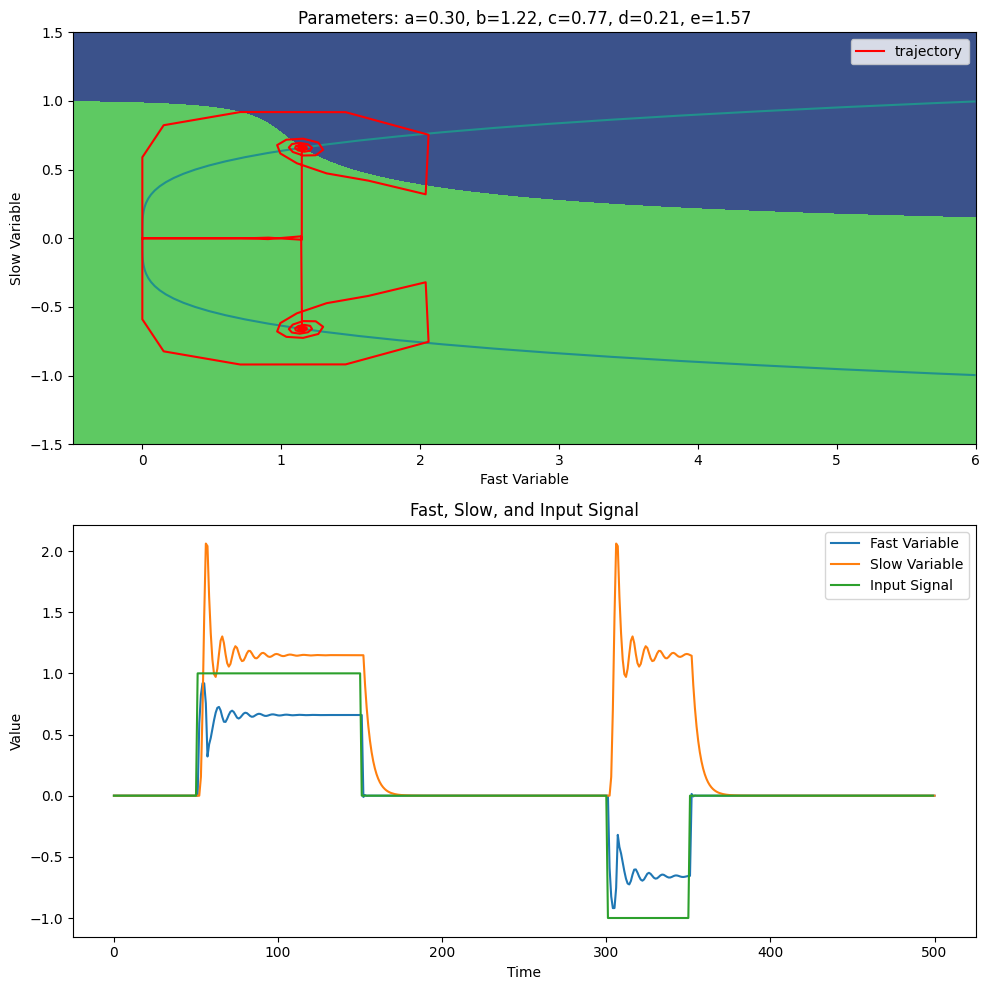

In [26]:
def update_plots_random(button):
    clear_output(wait=True)
    
    a = np.random.uniform(0, 2)
    b = np.random.uniform(0, 3)
    c = np.random.uniform(0.3, 1)
    d = np.random.uniform(0.03, 0.3)
    e = np.random.uniform(0, 2)
    
    pars = {'a': a, 'b': b, 'c': c, 'd': d, 'e': e}
    
    fig, axs = plt.subplots(2, 1, figsize=(10, 10))
    
    # Phase portrait and trajectory plot
    hfn, hsn = transition(hfs[0], hfs[1], pars, input_amplitude)
    axs[0].contourf(hfs[1], hfs[0], hfn - hfs[0], 0)
    axs[0].contour(hfs[1], hfs[0], hsn - hfs[1], 0)
    axs[0].set_title(f'Parameters: a={a:.2f}, b={b:.2f}, c={c:.2f}, d={d:.2f}, e={e:.2f}')
    axs[0].set_xlabel('Fast Variable')
    axs[0].set_ylabel('Slow Variable')
    
    trajectory = [init_point_trajectory]
    for i in range(trajectory_times_steps):
        next_fast, next_slow = transition(trajectory[-1][0], trajectory[-1][1], pars, input=input_signal[i])
        trajectory.append([next_fast, next_slow])
    trajectory = np.array(trajectory)
    axs[0].plot(trajectory[:, 1], trajectory[:, 0], label="trajectory", color="r")
    axs[0].legend()
    
    # Fast, slow, and input signal plot
    axs[1].plot(trajectory[:, 0], label="Fast Variable")
    axs[1].plot(trajectory[:, 1], label="Slow Variable")
    axs[1].plot(input_signal, label="Input Signal")
    axs[1].set_xlabel('Time')
    axs[1].set_ylabel('Value')
    axs[1].set_title('Fast, Slow, and Input Signal')
    axs[1].legend()
    
    plt.tight_layout()
    display(button)
    plt.show()
    

button = widgets.Button(description='Randomize Parameters')
button.on_click(update_plots_random)
display(button)